In [2]:
from MRF import *
import matplotlib.pyplot as plt

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
your_file_path_here = "/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/mrf_data.csv"

In [14]:
data_in = pd.read_csv(your_file_path_here)

In [18]:
oos_pos = np.arange(151,200) # lower should be oos start, upper the length of your dataset

In [19]:
MRF = MacroRandomForest(data = data_in,
                        y_pos = 0,
                        x_pos = np.arange(1,4), 
                        B = 100, 
                        resampling_opt = 2,
                        oos_pos = oos_pos,
                        trend_push = 4,
                        quantile_rate = 0.3, 
                        print_b = True,
                        fast_rw = True,
                        parallelise = True)

In [20]:
mrf_output = MRF._ensemble_loop()

In [24]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [25]:
my_preds

,Ensembled_Prediction
151,-0.352004
152,-0.863510
153,-0.651392
154,-1.762762
155,-2.050407
156,0.411156
157,-1.248717
158,0.897243
159,-0.323515
160,0.119863


Text(0.5, 0.98, 'Betas from Python and R implementation of the GDP_h1 dataset (first 100 columns). Python (light) and R (dark) colors.')

[6.0, 4.0]

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

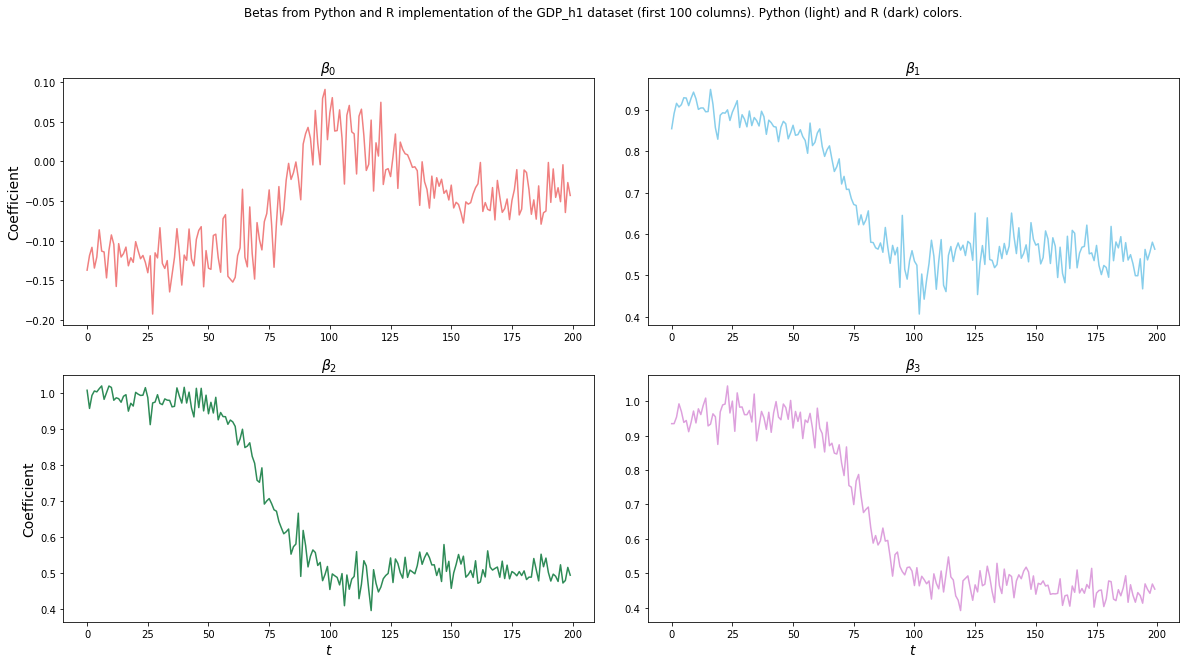

In [26]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("Betas from Python and R implementation of the GDP_h1 dataset (first 100 columns). Python (light) and R (dark) colors.")

plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (18,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

fig.set_size_inches(20, 10)

ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])

ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [27]:
mrf_output.keys()

dict_keys(['YandX', 'pred_ensemble', 'pred', 'S_names', 'betas', 'betas_draws_raw', 'betas_draws', 'model'])

Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, 'OOS predictions of MRF')

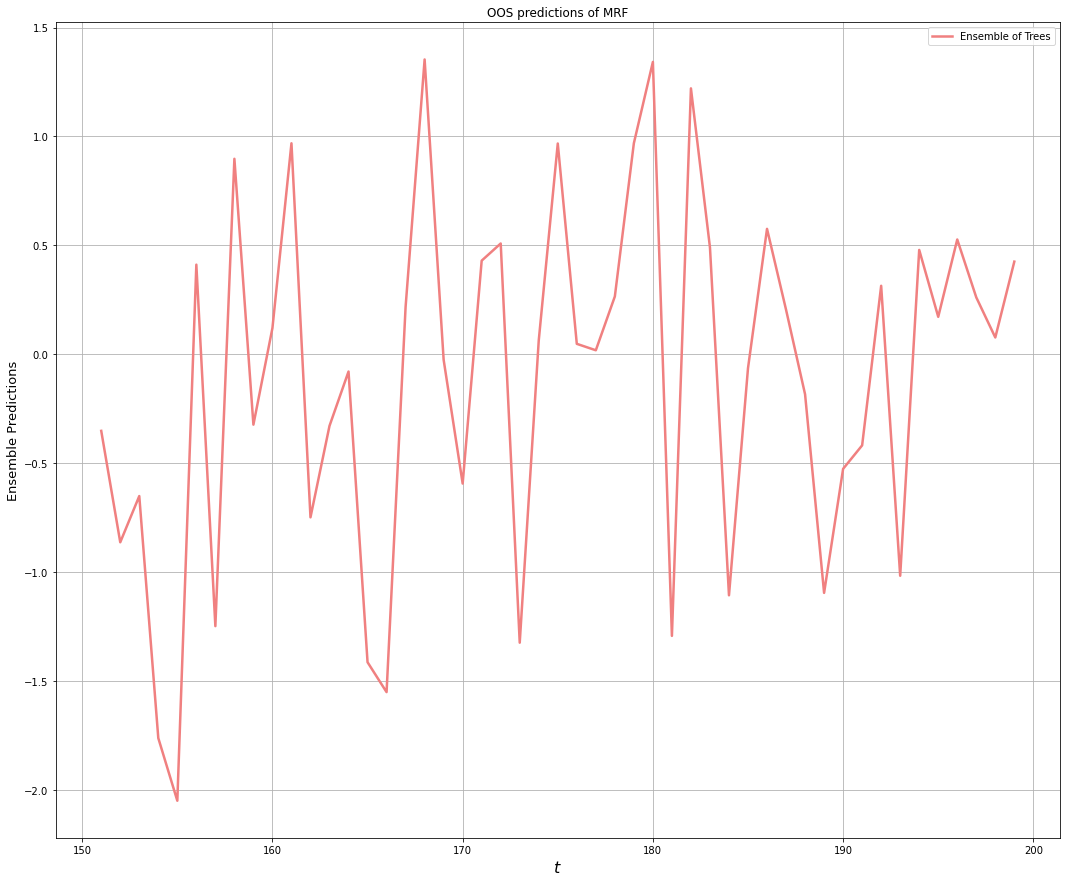

In [28]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(my_preds, color = 'lightcoral', linewidth = 2.5, label = "Ensemble of Trees")
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF")